In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
# df1 = pd.read_csv("data/cost-of-living_v2.csv")
df1 = pd.read_csv("data/cost-of-living.csv", index_col=0)
attribute_names = {
    "x1": "meal_inexpensive",
    "x2": "meal_mid_range",
    "x3": "mcmeal",
    "x4": "domestic_beer_restaurant",
    "x5": "imported_beer_restaurant",
    "x6": "cappuccino",
    "x7": "coke",
    "x8": "water",
    "x9": "milk",
    "x10": "white_bread",
    "x11": "rice",
    "x12": "eggs",
    "x13": "cheese",
    "x14": "chicken",
    "x15": "beef",
    "x16": "apples",
    "x17": "banana",
    "x18": "oranges",
    "x19": "tomato",
    "x20": "potato",
    "x21": "onion",
    "x22": "lettuce",
    "x23": "water",
    "x24": "wine",
    "x25": "domestic_beer_market",
    "x26": "imported_beer_market",
    "x27": "cigarettes",
    "x28": "one_way_ticket",
    "x29": "monthly_pass",
    "x30": "taxi_start",
    "x31": "taxi_1km",
    "x32": "taxi_1h",
    "x33": "gasoline",
    "x34": "vw_golf",
    "x35": "toyota_corolla",
    "x36": "basic_85m2",
    "x37": "1min_prepaid",
    "x38": "internet",
    "x39": "fitness_club",
    "x40": "tennis",
    "x41": "cinema",
    "x42": "preschool",
    "x43": "primary_school",
    "x44": "jeans",
    "x45": "summer_dress",
    "x46": "nike_shoes",
    "x47": "business_shoes",
    "x48": "apartment_1br_center",
    "x49": "apartment_1br_outside",
    "x50": "apartment_3br_center",
    "x51": "apartment_3br_outside",
    "x52": "per_square_meter_center",
    "x53": "per_square_meter_outside",
    "x54": "avg_month_salary",
    "x55": "mortgage_interest",
}
len(df1)

4874

## Data Preperation

In [ ]:
import pycountry_convert as pc

# Add continent-name
def country_name_to_continent_name(country_name):
    exceptions = {
        "Bosnia And Herzegovina": "Europe",
        "Trinidad And Tobago": "South America",
        "Isle Of Man": "Europe",
        "Curacao": "South America",
        "Kosovo (Disputed Territory)": "Europe",
    }
    if country_name in exceptions.keys():
        return exceptions[country_name]
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None

df1["continent"] = df1["country"].apply(country_name_to_continent_name)

# Filter for high-quality datasets
df1 = df1[df1["data_quality"]==1]

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x48,x49,x50,x51,x52,x53,x54,x55,data_quality,continent
0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,0.19,...,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1,Asia
1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,0.32,...,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1,Asia
2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,0.27,...,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15,1,Asia
3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,0.51,...,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80,1,Asia
4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,0.78,...,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47,1,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,Haugesund,Norway,15.37,80.43,12.06,8.60,8.55,4.32,3.34,2.87,...,703.75,552.95,1306.93,1080.73,2473.18,2243.39,3310.20,2.57,1,Europe
4258,Lagos,Portugal,8.31,62.32,7.27,2.60,2.60,1.77,1.77,1.42,...,869.91,706.31,1627.29,1201.74,3467.10,3401.40,910.11,3.33,1,Europe
4341,Porto Calvo,Brazil,4.66,25.16,5.59,1.86,2.24,1.69,1.03,0.69,...,298.14,241.46,542.24,444.88,1229.83,1071.44,385.78,8.17,1,South America
4426,Fairfax,United States,19.38,75.00,10.00,6.00,7.62,5.06,2.42,1.78,...,2200.00,1733.33,3560.00,2825.00,6754.35,2891.90,6117.78,4.90,1,North America


## Free exploration

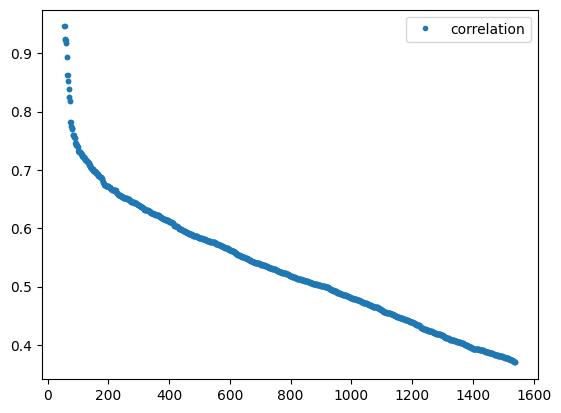

1485


np.int64(45089)

In [153]:

# compute correlations
pairs = []
num_cols = [col for col in df1.columns if ("x" in col)]
for col1 in num_cols:
    for col2 in num_cols:
        pairs.append((col1, col2, df1[col1].corr(df1[col2])))

# store as dataframe
df_corr = (
    pd.DataFrame(pairs, columns=["column_1", "column_2", "correlation"])
    .sort_values(by="correlation", ascending=False)
    .reset_index(drop=True)
)
df_corr = df_corr[df_corr["column_1"]!=df_corr["column_2"]]
df_corr = df_corr.head(int(len(df_corr)/2))
df_corr.plot(style=".")
plt.show()
print(len(df_corr))

# pairplot of attributes that have strong correlations
strong_correlating_cols = (
    df_corr
    .head(15)
    [["column_1", "column_2"]]
    .unstack()
    .sort_values()
    .unique()
    .tolist()
)
# sns.pairplot(
#     df1[strong_correlating_cols].rename(columns=attribute_names),
#     diag_kind="kde",
# )

# Correlations with apple price attribute
(
    df_corr
    [df_corr["column_1"]=="x16"]
    .sort_values(by="correlation", ascending=False)
    .reset_index(drop=True)
)

# Evaluating Number of none/nan-values
(
    (df1[num_cols].isnull() | df1[num_cols].isna())
    .sum().sum()
)

# for col in num_cols:
#     df1[col].plot.box()
#     plt.show()
